<h2>Model Analysis

In [49]:
# Import relevant packages 
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import LeaveOneOut
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
from adjustText import adjust_text

In [50]:
# define data path
data_path = "/Users/lanzia/Desktop/Study/FS 2025/01.1st Semester/Introduction to Data in Business Analytics/Project/Data/Saved_Tables/"

In [51]:
# define financial columns to be used in correlation analysis
fin_data_cols = ['two_year_avg',
                 'avg_Closing_Price',
                 'avg_Market_Value',
                 'avg_Sales',
                 'avg_1_Year_Growth_Total_Sales',
                 'avg_FE_Sales_Mean_FY1_Roll',
                 'avg_EBITDA_Oper_Income',
                 'avg_FE_Ebitda_Mean_FY1_Roll',
                 'avg_Earns_Per_Share',
                 'avg_FE_Eps_Mean_FY1_Roll',
                 'avg_FE_Val_Roe_Mean_FY1_Roll',
                 'avg_Return_on_Avg_Total_Assets',
                 'avg_FE_Val_Pe_Mean_FY1_Roll',
                 'avg_Resrch_and_Develop_Expense'
                 ]

In [52]:
# read the data
AI_usage_upd = pd.read_excel(data_path + "02_AI_usage_upd.xlsx", engine="openpyxl")
AI_acceptance_upd = pd.read_excel(data_path + "02_AI_acceptance_upd.xlsx", engine="openpyxl")

<h4>Correlation Matrix Between Average Usage and Financial Metrics

In [53]:
# correlation matrix for AI usage:
corrs_usage = AI_usage_upd[fin_data_cols].corr()['two_year_avg'].drop('two_year_avg')
print(corrs_usage)

avg_Closing_Price                 0.246628
avg_Market_Value                  0.741844
avg_Sales                        -0.299682
avg_1_Year_Growth_Total_Sales     0.829988
avg_FE_Sales_Mean_FY1_Roll       -0.279637
avg_EBITDA_Oper_Income            0.196545
avg_FE_Ebitda_Mean_FY1_Roll       0.276269
avg_Earns_Per_Share              -0.034621
avg_FE_Eps_Mean_FY1_Roll          0.058635
avg_FE_Val_Roe_Mean_FY1_Roll      0.315154
avg_Return_on_Avg_Total_Assets    0.539319
avg_FE_Val_Pe_Mean_FY1_Roll       0.657914
avg_Resrch_and_Develop_Expense    0.520065
Name: two_year_avg, dtype: float64


<h4>Part 1: Linear Regression

**Independent variables**:

two_year_avg

**Dependent variables**: 

avg_Market_Value<br>
avg_1_Year_Growth_Total_Sales<br>
avg_FE_Val_Pe_Mean_FY1_Roll<br>
avg_Resrch_and_Develop_Expense

In [54]:
# Subset of original usage table for regression
AI_usage_regr = AI_usage_upd[["two_year_avg",
                              "avg_Market_Value",
                              "avg_1_Year_Growth_Total_Sales",
                              "avg_FE_Val_Pe_Mean_FY1_Roll",
                              "avg_Resrch_and_Develop_Expense"]].copy()
AI_usage_regr

,two_year_avg,avg_Market_Value,avg_1_Year_Growth_Total_Sales,avg_FE_Val_Pe_Mean_FY1_Roll,avg_Resrch_and_Develop_Expense
0,10.7,78365.5,9.3,48.0,328.9
1,3.9,108144.1,3.0,27.8,1545.9
2,0.0,138333.1,1.0,19.7,2864.8
3,5.5,59861.6,10.6,35.8,833.6
4,0.0,81811.8,2.5,16.9,471.3
5,8.8,89498.9,11.2,29.4,2018.7
6,6.4,84060.1,6.0,19.7,2825.1
7,2.7,62269.2,5.1,26.4,677.5
8,19.7,336661.3,11.7,34.5,4589.1
9,0.0,42576.8,2.6,19.6,1795.0


In [55]:
# define x and y columns
X_cols = ["avg_Market_Value",
          "avg_1_Year_Growth_Total_Sales",
          "avg_FE_Val_Pe_Mean_FY1_Roll",
          "avg_Resrch_and_Develop_Expense"]

X = sm.add_constant(AI_usage_regr[X_cols])
y = AI_usage_regr["two_year_avg"]

In [56]:
# Fit model
ols_model = sm.OLS(y, X).fit()

In [57]:
# Model Fit Statistics
n = int(ols_model.nobs)
k = len(ols_model.params) - 1
SSR = float(sum(ols_model.resid ** 2))
SSE_model = float(ols_model.ess)
SST = float(ols_model.centered_tss)
R2 = float(ols_model.rsquared)
adjR2 = float(ols_model.rsquared_adj)
F = float(ols_model.fvalue) if ols_model.fvalue is not None else None
pF = float(ols_model.f_pvalue) if ols_model.f_pvalue is not None else None
Root_MSE = (SSR / ols_model.df_resid) ** 0.5

In [58]:
fit_stats = pd.DataFrame({"Statistic": ["Number of obs",
                                        "F-statistic",
                                        "Prob > F",
                                        "R-squared",
                                        "Adj R-squared",
                                        "SSR (Residual SS)",
                                        "SSE (Model SS)",
                                        "SST (Total SS)",
                                        "Root MSE"],
                          "Value": [n,
                                    round(F, 4),
                                    round(pF, 4),
                                    round(R2, 4),
                                    round(adjR2, 4),
                                    round(SSR, 4),
                                    round(SSE_model, 4),
                                    round(SST, 4),
                                    round(Root_MSE, 4)]
                            })

In [59]:
# Sample print
print("\n======================== Model Fit Summary ========================\n")
print(fit_stats.to_string(index=False))


======================== Model Fit Summary ========================

        Statistic    Value
    Number of obs  10.0000
      F-statistic  20.9461
         Prob > F   0.0025
        R-squared   0.9437
    Adj R-squared   0.8986
SSR (Residual SS)  19.1926
   SSE (Model SS) 321.6084
   SST (Total SS) 340.8010
         Root MSE   1.9592


In [60]:
# Create output table
output_summary = pd.concat([ols_model.params, ols_model.bse, ols_model.tvalues, ols_model.pvalues, ols_model.conf_int()],
                           axis=1)
output_summary.columns = ["Coef.", "Std. Err.", "t", "P>|t|", "[95% Conf. Interval] lower", "[95% Conf. Interval] upper"]
output_summary.index.name = "Variable"

In [61]:
# Sample print
print("\n====================== Coefficient Estimates ======================\n")
print(output_summary)


====================== Coefficient Estimates ======================

                                   Coef.  Std. Err.         t     P>|t|  \
Variable                                                                  
const                          -8.015925   2.859908 -2.802861  0.037866   
avg_Market_Value                0.000029   0.000015  1.873158  0.119926   
avg_1_Year_Growth_Total_Sales   0.690407   0.263512  2.620019  0.047097   
avg_FE_Val_Pe_Mean_FY1_Roll     0.178103   0.122911  1.449032  0.207005   
avg_Resrch_and_Develop_Expense  0.000762   0.001022  0.745434  0.489547   

                                [95% Conf. Interval] lower  \
Variable                                                     
const                                           -15.367553   
avg_Market_Value                                 -0.000011   
avg_1_Year_Growth_Total_Sales                     0.013027   
avg_FE_Val_Pe_Mean_FY1_Roll                      -0.137851   
avg_Resrch_and_Develop_Expense  

**Notes**:<br>
we habe very limited sample size, though correlation between avg_1_Year_Growth_Total_Sales and usage_rate is high, the model runs into overfitting issue. Although model fits the sample well, but coefficients are uncertain.

<h4>Part 2: Principle Compenent Regression

In [62]:
# define X and y
X = AI_usage_regr[X_cols].values
y = AI_usage_regr["two_year_avg"].values

# Standardize predictors
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [63]:
# PCA fit
pca = PCA()
Z = pca.fit_transform(X_std)          
expl = pca.explained_variance_ratio_  # explained variance per PC
cum_expl = np.cumsum(expl)            # cumulative explained variance

In [64]:
# Variables contribution to each PC
loadings = pd.DataFrame(pca.components_.T, index=X_cols,
                        columns=[f"PC{i+1}" for i in range(len(X_cols))])

In [65]:
# Print each PC
print("\n=== PCA Loadings (Weights of each variable per component) ===")
print(loadings.round(4))


=== PCA Loadings (Weights of each variable per component) ===
                                   PC1     PC2     PC3     PC4
avg_Market_Value                0.5878 -0.3475 -0.4844 -0.5469
avg_1_Year_Growth_Total_Sales   0.5337  0.4215  0.6731 -0.2906
avg_FE_Val_Pe_Mean_FY1_Roll     0.3898  0.6204 -0.4969  0.4650
avg_Resrch_and_Develop_Expense  0.4666 -0.5627  0.2556  0.6327


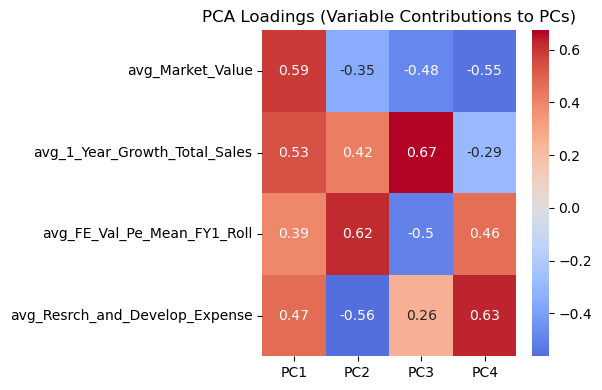

In [66]:
# Heat map for variables contribution
loadings_df = pd.DataFrame(pca.components_.T,
                           index=X_cols,
                           columns=[f"PC{i+1}" for i in range(pca.n_components_)])

plt.figure(figsize=(6,4))
sns.heatmap(loadings_df, annot=True, cmap="coolwarm", center=0)
plt.title("PCA Loadings (Variable Contributions to PCs)")
plt.tight_layout()
plt.show()

In [67]:
# Principal Components Regression (PCR)

# define function using Leave-One-Out regression
def pcr_loocv(Z, y, m):
    Zm = Z[:, :m]
    loo = LeaveOneOut()
    preds = np.zeros_like(y, dtype=float)
    for tr, te in loo.split(Zm):
        lr = LinearRegression().fit(Zm[tr], y[tr])
        preds[te[0]] = lr.predict(Zm[te])[0]
    return np.mean((y - preds)**2)

# Compare 1..4 PCs
rows = []
for m in range(1, Z.shape[1]+1):
    ols = sm.OLS(y, sm.add_constant(Z[:, :m])).fit()
    rows.append({"m_PCs": m,
                 "R2": float(ols.rsquared),
                 "Adj_R2": float(ols.rsquared_adj),
                 "AIC": float(ols.aic),
                 "BIC": float(ols.bic),
                 "LOOCV_MSE": pcr_loocv(Z, y, m)})
pcr_cmp = pd.DataFrame(rows)


In [68]:
# Final PCR using best m (lowest LOOCV MSE)
best_m = int(pcr_cmp.loc[pcr_cmp["LOOCV_MSE"].idxmin(), "m_PCs"])
ols_best = sm.OLS(y, sm.add_constant(Z[:, :best_m])).fit()
print("Best m:", best_m)
print(ols_best.summary())

Best m: 1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     85.31
Date:                Thu, 23 Oct 2025   Prob (F-statistic):           1.53e-05
Time:                        11:38:36   Log-Likelihood:                -19.551
No. Observations:                  10   AIC:                             43.10
Df Residuals:                       8   BIC:                             43.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7700      0.604      9.54

In [69]:
# Get PCR result for the best PC
names = getattr(ols_best.model, "exog_names", None)

params = pd.Series(ols_best.params, index=names, name="Coef.")
bse    = pd.Series(ols_best.bse,    index=names, name="Std. Err.")
tvals  = pd.Series(ols_best.tvalues,index=names, name="t")
pvals  = pd.Series(ols_best.pvalues,index=names, name="P>|t|")
conf_arr = ols_best.conf_int() 
conf = pd.DataFrame(conf_arr, index=names,
                    columns=["[95% Conf. Interval] lower", "[95% Conf. Interval] upper"])
summary_df = pd.concat([params, bse, tvals, pvals, conf], axis=1)
summary_df.index.name = "Variable"

summary_df

,Coef.,Std. Err.,t,P>|t|,[95% Conf. Interval] lower,[95% Conf. Interval] upper
Variable,,,,,,
const,5.770000,0.604359,9.547303,0.000012,4.376345,7.163655
x1,3.872836,0.419313,9.236137,0.000015,2.905897,4.839774


**PC1 Visualization**

In [70]:
# Take PC1 from PCA scores
pc1 = Z[:, 0]
ols_pc1 = sm.OLS(y, sm.add_constant(pc1)).fit()

# 95% CI
xg = np.linspace(pc1.min(), pc1.max(), 200)
pred = ols_pc1.get_prediction(sm.add_constant(xg)).summary_frame(alpha=0.05)


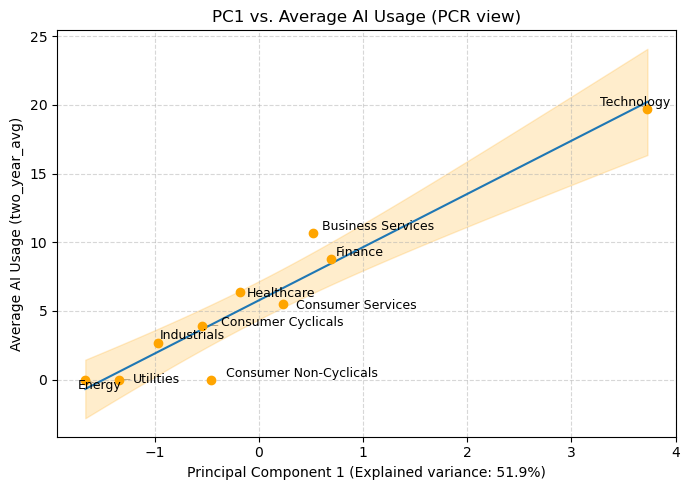

In [71]:
# generate the graph
plt.figure(figsize=(7,5))
plt.scatter(pc1, y, zorder=3, color='Orange')
texts = []
for xi, yi, name in zip(pc1, y, AI_usage_upd.loc[AI_usage_regr.index, "Sector"]):
    texts.append(plt.text(xi, yi, name, fontsize=9))
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))
plt.plot(xg, pred["mean"], zorder=2)
plt.fill_between(xg, pred["mean_ci_lower"], pred["mean_ci_upper"], color='Orange', alpha=0.2, zorder=1)
plt.xlabel(f"Principal Component 1 (Explained variance: {expl[0]*100:.1f}%)")
plt.ylabel("Average AI Usage (two_year_avg)")
plt.title("PC1 vs. Average AI Usage (PCR view)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

In [72]:
# Save all regression analysis result:

with pd.ExcelWriter(data_path + "04_Model_Analysis_Results.xlsx", engine="openpyxl") as writer:
    corrs_usage.to_excel(writer, sheet_name="Correlation_Matrix", index=True)
    fit_stats.to_excel(writer, sheet_name="Linear_Regression_Fit_Stats", index=False)
    output_summary.to_excel(writer, sheet_name="Linear_Regression_Result", index=True)
    loadings.to_excel(writer, sheet_name="PCA_Loadings", index=True)
    summary_df.to_excel(writer, sheet_name="PCR_Best_Result", index=False)